# Mplchart Tests

In [5]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import SMA, EMA, WMA, HMA, ROC, RSI, MACD, DMI

In [6]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-14 00:00:00-04:00 to 2024-10-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   int64  
 5   Dividends     1258 non-null   float64
 6   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB


get_color ema line
get_color hma line
get_color rsi line
get_color oversold fill
get_color overbought fill
get_color macd line
get_color macdsignal line
get_color macdhist fill


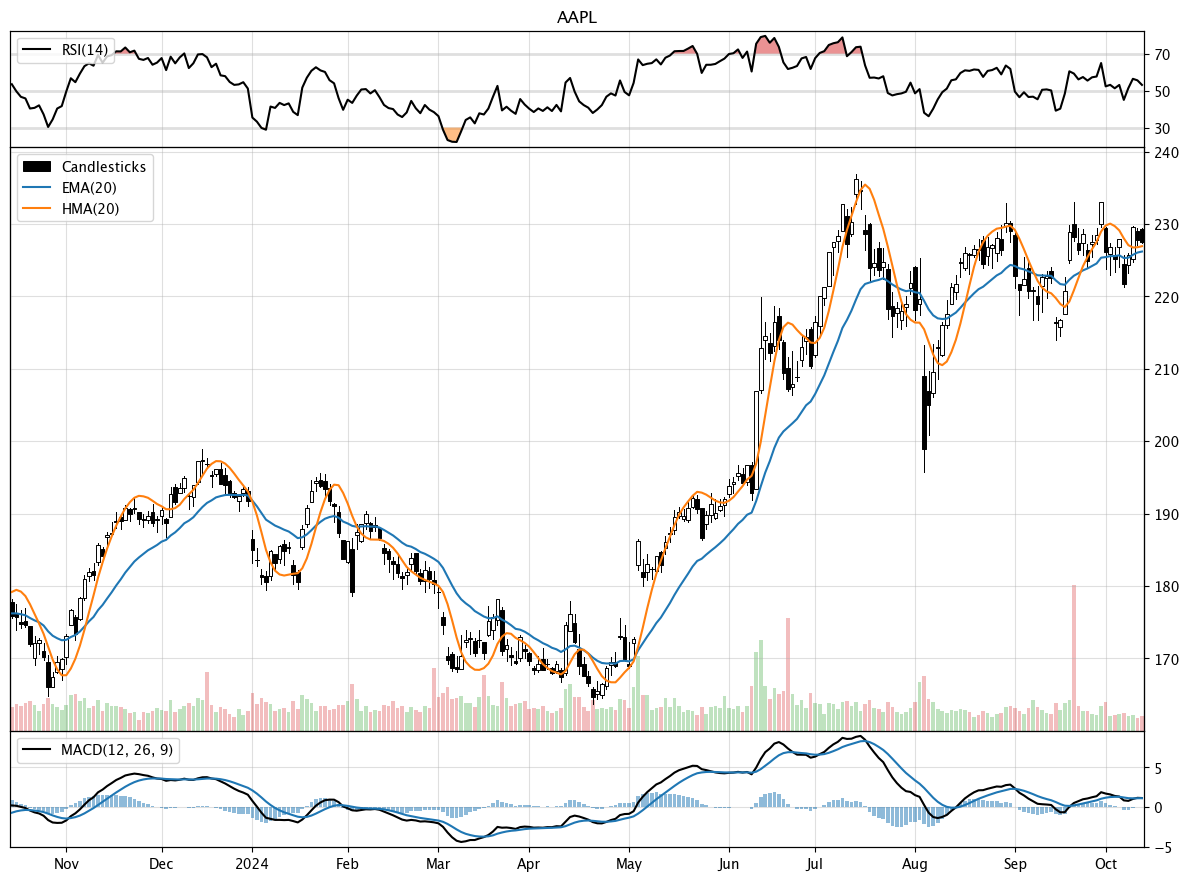

In [7]:
max_bars = 250

indicators = [
    Candlesticks(),
    EMA(20),
    HMA(20),
    Volume(),
    RSI(),
    MACD(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

get_color ema line
get_color hma line
get_color rsi line
get_color oversold fill
get_color overbought fill
get_color macd line
get_color macdsignal line
get_color macdhist fill
get_color adx line
get_color pdi line
get_color ndi line
get_color composedindicator line


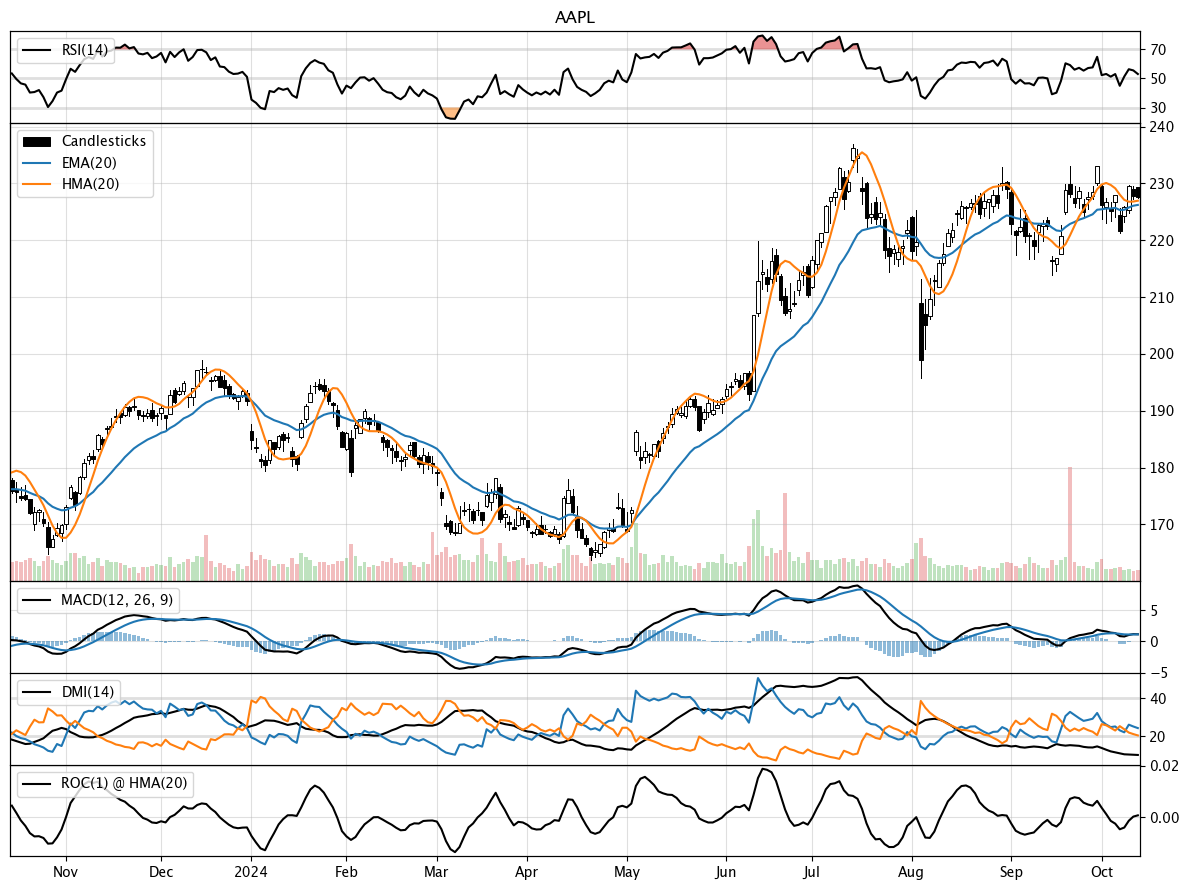

In [8]:
max_bars = 250

indicators = [
    Candlesticks(),
    EMA(20),
    HMA(20),
    Volume(),
    RSI(),
    MACD(),
    DMI(),
    ROC(1) @ HMA(20)
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)